# Linear Regression
## Cost function

A $n$-feature model, where $\hat{y}$ is the predicted value and $\theta$ is the model of $n$ parameters
\begin{equation}
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n
\end{equation}

or in vectorized form

\begin{equation}
\hat{y} = h_{\theta}(\mathbf{x}) = \theta^{T} \cdot \mathbf{x}
\end{equation}

## Mean Square Error (MSE)

Minimizing the Mean Square Error allows for deterministic evaluation (via normal equation) or stochastic means (GradDesc, SGD etc.)

\begin{equation}
{\rm MSE} (\mathbf{X}, h_{\theta}) = \frac{1}{m} \sum^{m}_{i=1}  \left(\theta^{T} \cdot \mathbf{x}^{(i)} - y^{(i)} \right)^2
\end{equation}

## Normal Equation
\begin{equation}
\hat{\theta} = \left( \mathbf{X}^T \cdot \mathbf{X} \right)^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
\end{equation}

In [31]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

X = 2* np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

In [10]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.80039972],
       [3.15424236]])

In [12]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.80039972],
       [10.10888445]])

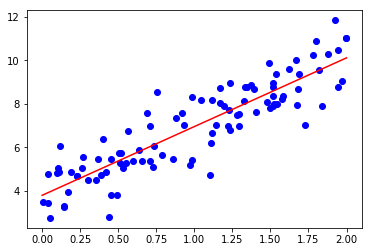

In [19]:
plt.plot(X,y,'bo')
plt.plot(X_new,y_predict,'r-')
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.80039972],
       [10.10888445]])

### Gradient descent

\begin{equation}
\frac{\partial}{\partial\theta_i}{\rm MSE} (\theta) = \frac{2}{m} \sum^{m}_{i=1}  \left(\theta^{T} \cdot \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)}
\end{equation}

or in vectorized form

\begin{equation}
\nabla_{\theta}{\rm MSE} (\theta) = \frac{2}{m} \mathbf{X}^T \cdot \left( \mathbf{X} \cdot \theta -\mathbf{y}\right)
\end{equation}

and in order to find the optimum $\theta$:

\begin{equation}
\theta^{\rm next} = \theta -\eta\nabla_{\theta}{\rm MSE} (\theta)
\end{equation}

In [24]:
eta = 0.1
n_iterations = 1000
m=100

theta = np.random.randn(2,1)

for it in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [25]:
theta

array([[3.80039972],
       [3.15424236]])

### Stochastic Gradient Descent

In [26]:
n_epochs = 50

t0, t1 = 5, 50 # hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [27]:
theta

array([[3.76174281],
       [3.19332364]])

In [ ]:
# with sklearn

In [30]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81304028]), array([3.17386248]))

### Summary
Optimasation algorithms
* Normal equation
* Batch Gradient Descent
* Stochastic Gradient Descent
* Mini-batch Gradient Descent

## Polynomial Regression

In [110]:
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 *X**2 + X + 2 + np.random.randn(m,1)

In [111]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # -> turning [x] into [(1,) x, x^2] while leading 1 if include_bias=True
X[0], X_poly[0]

(array([-14.1820942]), array([-14.1820942, 201.1317959]))

In [112]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11845192]), array([[1.02320999, 0.50003608]]))

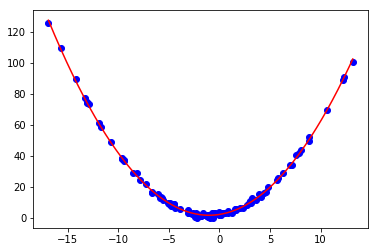

In [115]:
plt.plot(X,y,'bo')
res=1000
# dx=(max(X)-min(X))/res
# x_plt=[x*dx+min(X) for x in range(res)]
x_plt=np.linspace(min(X), max(X), res).reshape(-1,1)
y_plt=lin_reg.predict(poly_features.fit_transform(x_plt))
plt.plot(x_plt,y_plt, 'r-')

## Learning Curves

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")

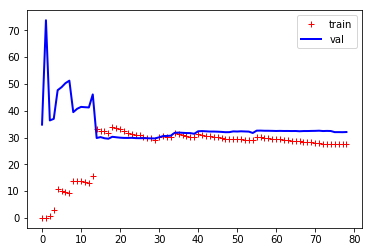

In [82]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend()

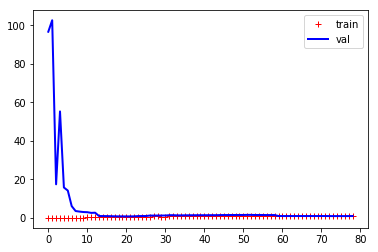

In [91]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=8, include_bias=False)),
    ("lin_reg", LinearRegression())
))
plot_learning_curves(polynomial_regression, X, y)
plt.legend()

### Summary
Model fine-tuning:
    * Over-fitting -> Use less parameters in model
    * underfitting -> use more complex model
    * Bias vs. Viariance vs. Irreducible Error

## Regularized Linear Models

### Ridge Regression
\begin{equation}
J(\theta) = {\rm MSE} (\theta) + \alpha \frac{1}{2}\sum_{i=1}^{n} \theta_i^2
\end{equation}

meaning $\theta_0$ is not regularized. It also exists as a closed-form solution:

\begin{equation}
\hat{\theta} = \left( \mathbf{X}^T \cdot \mathbf{X} + \alpha\mathbf{A} \right)^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
\end{equation}

In [93]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[22.8055164]])

In [102]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=500, tol=1e-3)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([12.14099918])

### LASSO Regression (Least Absolute Shrinkage and Selection Operator Regression)

\begin{equation}
J(\theta) = {\rm MSE} (\theta) + \alpha \sum_{i=1}^{n} | \theta_i |
\end{equation}

* Tends to eliminate the least important feature and therefore performs feature selection.
* Outputs a sparse model


In [96]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([22.81303747])

In [107]:
sgd_reg = SGDRegressor(penalty="l1", max_iter=500, tol=1e-3)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([15.02147229])

### ElasticNet

\begin{equation}
J(\theta) = {\rm MSE} (\theta) + r\alpha \frac{1}{2}\sum_{i=1}^{n} | \theta_i | + \frac{1-r}{2}\alpha \sum_{i=1}^{n} ( \theta_i )^2
\end{equation}

In [97]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([22.81310929])

### Early stopping

In [103]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    sgd_reg.fit(X_train, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [105]:
best_model
# .predict([[1.5]])

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=None, n_iter=1, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)

### Summary
* Ridge regression
* Lasso regression
* ElasticNet
* Early stopping (prevent overfitting by not going all the way to global minimum)

## Logistic Regression

In [108]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

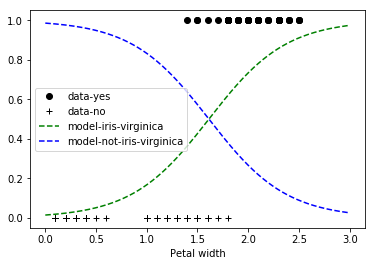

In [166]:
X=iris["data"][:,3:] # petal width
y=(iris["target"] == 2).astype(np.int)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X[y==1], y[y==1], "ko", label="data-yes")
plt.plot(X[y==0], y[y==0], "k+", label="data-no")
plt.plot(X_new, y_proba[:,1], "g--", label="model-iris-virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="model-not-iris-virginica")
plt.xlabel("Petal width")
plt.legend()


# Softmax

In [153]:
X=iris["data"][:,(2,3)] # petal length, petal width
y=iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5, 2]])

array([2])

In [154]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134076e-07, 5.75276067e-02, 9.42471760e-01]])

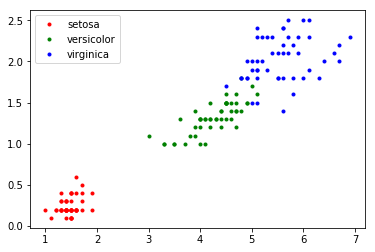

In [155]:
plt.plot(X[y==0, 0],X[y==0, 1], 'r.', label='setosa')
plt.plot(X[y==1, 0],X[y==1, 1], 'g.', label='versicolor')
plt.plot(X[y==2, 0],X[y==2, 1], 'b.', label='virginica')
plt.legend()

# Exercises